## The goal is to study what makes the decision boundary linear

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import tensorflow as tf
import pandas as pd
import glob2
import os
from itertools import product
import numpy as np
#import seaborn as sns

%matplotlib notebook
#%matplotlib

from tboard import file2number
from vis_utils import split_posneg,get_path
from vis_utils import get_neuron_values
from nonlinearities import sigmoid
from vis_utils import splitL

clist=['g','c','m','y','k','b','r']
listLineStyle=['solid', 'dashed', 'dashdot', 'dotted']

In [4]:
from vis_utils import (split_posneg , get_path, get_np_network,
                        get_neuron_values, splitL, load_weights,
                        resample_grid,vec_get_neuron_values,
                        get_del_weights  )
from calc_maps import (get_net_states,rescale_weights,compose_affine)

In [5]:
log_dir='./logs/Model_0221_101830_R2Clean4442'

In [6]:
record_dir=os.path.join(log_dir,'records')
id_str=str(file2number(log_dir))
all_weights=load_weights(log_dir)
all_step=np.load(get_path('step','wwatch',log_dir))
dt=10
weights=[[w[::dt],b[::dt]] for w,b in all_weights]
arch=[b.shape[-1] for w,b in weights[:-1]]#net architecture
del_weights=get_del_weights(weights)
step=all_step[::dt]
del_weights=get_del_weights(weights)
gridX=np.load(get_path('gridX','hmwatch',log_dir))
GridX=resample_grid(gridX)
npX=np.load(os.path.join(record_dir,'dataX.npy'))
npY=np.load(os.path.join(record_dir,'dataY.npy'))
Xpos,Xneg,Ypos,Yneg=split_posneg(npX,npY)


In [7]:
W_weights,b_weights=zip(*del_weights)
W1,W2,W3,W4=W_weights
b1,b2,b3,b4=b_weights
W1f,W2f,W3f,W4f=W1[-1],W2[-1],W3[-1],W4[-1]#final weights
b1f,b2f,b3f,b4f=b1[-1],b2[-1],b3[-1],b4[-1]#final weights
#delW4f=np.reshape(W4[-1,:,1]-W4[-1,:,0], [-1,1])
#delb4f=b4[-1,1]-b4[-1,0]


In [25]:
time=-1
time_weights=[[w[time],b[time]] for w,b in del_weights]
Sig,Centers,Cnts=get_net_states(GridX,time_weights)
sigl=np.split(Sig,np.cumsum(arch)[:-1],axis=-1)
new_weights=rescale_weights(time_weights,sigl)
Linear,Bias=compose_affine(new_weights)
M=np.concatenate([Linear,np.expand_dims(Bias,-1)],axis=-2)#idx,xdim+1,1
cnt_thresh=np.percentile(Cnts,20)
ix_thresh=np.where( Cnts>=cnt_thresh )[0]
M2=M/np.linalg.norm(M,ord=2,axis=(-2,-1),keepdims=True)
M2=np.squeeze(M2)
#M2=M/M.sum(axis=1,keepdims=True)

#print np.around(M2[ix_thresh],2)
#print np.around(np.concatenate([ M2[ix_thresh], np.expand_dims(Cnts[ix_thresh],-1) ],axis=-1),2)


[[-7.7000e-01 -6.0000e-02  6.4000e-01  1.2978e+04]
 [-9.7000e-01 -8.0000e-02  2.5000e-01  8.4000e+01]
 [ 0.0000e+00  0.0000e+00 -1.0000e+00  1.6903e+04]
 [-9.7000e-01 -8.0000e-02  2.5000e-01  7.0000e+00]
 [ 0.0000e+00  0.0000e+00 -1.0000e+00  2.6300e+02]
 [ 0.0000e+00  0.0000e+00 -1.0000e+00  6.0990e+03]
 [-1.0000e+00 -8.0000e-02 -2.0000e-02  7.2400e+02]
 [ 0.0000e+00  0.0000e+00 -1.0000e+00  6.0470e+03]
 [-8.9000e-01 -7.0000e-02 -4.6000e-01  3.8890e+03]]


In [86]:
gX0,gX1=GridX[:,:,0],GridX[:,:,1]
gX=GridX
P_Layers=get_neuron_values(gX,time_weights)

In [87]:
P_Layers[-1].shape

(235, 200, 1)

In [ ]:
def draw_layer(Layer,ax):
    contour_list=[]


In [93]:
#plt.text(1, -0.6, r'$\sum_{i=0}^\infty x_i$', fontsize=20)

M2.shape

In [96]:
M2[3]

array([-0.96579759, -0.07829664,  0.24719355])

In [ ]:
Arr=M2
str_aff=[np.array2string(s,precision=2) for s in Arr]
loc_str=[c for c in Centers]

alignment = {'horizontalalignment': 'center'}

for txt,loc in zip(str_aff,loc_str):
    ax.text(loc[0],loc[1],txt,**alignment)
    ax.plot(loc[0],loc[1],c='c')

In [104]:
Centers

array([[-1.45640421,  0.82414068],
       [-0.98966419,  2.18366192],
       [ 1.36164388,  1.08014981],
       [-0.71590415, -1.01851592],
       [ 0.59591616,  1.13165116],
       [ 0.32725922,  0.98165146],
       [-0.84880793,  0.95513563],
       [-0.9054873 ,  2.0118522 ],
       [-0.20836186,  0.97865961],
       [-0.53224548,  1.65934603],
       [-0.48040634,  1.03727633],
       [-0.64696074,  0.97621038]])

In [102]:
str_aff

['[-0.77 -0.06  0.64]',
 '[-0.97 -0.08  0.25]',
 '[ 0.  0. -1.]',
 '[-0.97 -0.08  0.25]',
 '[ 0.  0. -1.]',
 '[ 0.  0. -1.]',
 '[-1.   -0.08 -0.02]',
 '[-0.95 -0.08 -0.31]',
 '[ 0.  0. -1.]',
 '[-0.76 -0.06 -0.65]',
 '[-0.87 -0.07 -0.48]',
 '[-0.89 -0.07 -0.46]']

In [99]:
np.array2string(s,precision=2)

'[-0.97 -0.08  0.25]'

In [100]:
np.array2string(s,formatter={'float_kind':'{0:.3f}'.format})

'[-0.966 -0.078 0.247]'

<IPython.core.display.Javascript object>


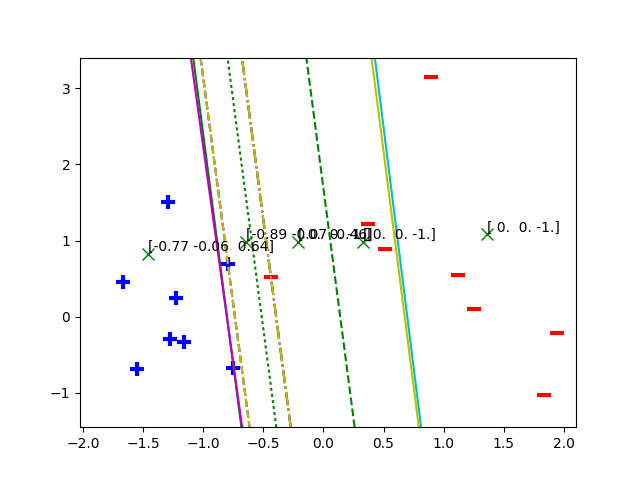

In [118]:
fig,ax=plt.subplots()
gX0,gX1=GridX[:,:,0],GridX[:,:,1]
gX=GridX

CT_lists=[]

for l,Layer in enumerate(P_Layers):
    listL=splitL(Layer)
    contour_list=[]
    for i,Pneu in enumerate(listL):
        ctf=ax.contour(gX0,gX1,Pneu,colors=clist[i],levels=[0.],linestyles=listLineStyle[l])
        contour_list.append(ctf)
    CT_lists.append(contour_list)
    
ax.scatter(Xpos[:,0],Xpos[:,1],marker='+',s=100,c='b',linewidth='3')
ax.scatter(Xneg[:,0],Xneg[:,1],marker='_',s=100,c='r',linewidth='3')

ix10C=np.where( Cnts>=1000 )[0]
Arr=M2[ix10C]
Loc=Centers[ix10C]
str_aff=[np.array2string(s,precision=2) for s in Arr]
loc_str=[c for c in Loc]

#alignment = {'horizontalalignment': 'center'}
alignment = {'horizontalalignment': 'left',
             'verticalalignment':'bottom'}

for txt,loc in zip(str_aff,loc_str):
    ax.text(loc[0],loc[1],txt,**alignment)
    #ax.plot(loc[0],loc[1],style='gx',markersize=120)
    ax.plot(loc[0],loc[1],color='green',marker='x',markersize=8)
plt.savefig(record_dir+'/'+id_str+'_RegionOverlay_AffMaps.pdf')

In [40]:
ix1C=np.where( Cnts>=100 )[0]

In [29]:
flat_ix=np.array([2,4,5,8])
M2[flat_ix]

array([[ 0.,  0., -1.],
       [ 0.,  0., -1.],
       [ 0.,  0., -1.],
       [ 0.,  0., -1.]])

In [31]:
Cnts[flat_ix]

array([16903,   263,  6099,  6047])

In [33]:
Sig[flat_ix]

array([[1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]])

In [35]:
sigl[-1][flat_ix]

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [36]:
Centers[flat_ix]

array([[ 1.36164388,  1.08014981],
       [ 0.59591616,  1.13165116],
       [ 0.32725922,  0.98165146],
       [-0.20836186,  0.97865961]])

In [42]:
Sig1C,Centers1C,Cnts1C,M1C=Sig[ix1C],Centers[ix1C],Cnts[ix1C],M2[ix1C]

In [44]:
Cnts1C

array([12978, 16903,   263,  6099,   724,  6047,  3889])

In [45]:
Centers1C

array([[-1.45640421,  0.82414068],
       [ 1.36164388,  1.08014981],
       [ 0.59591616,  1.13165116],
       [ 0.32725922,  0.98165146],
       [-0.84880793,  0.95513563],
       [-0.20836186,  0.97865961],
       [-0.64696074,  0.97621038]])

In [46]:
print np.around(M1C,2)

[[-0.77 -0.06  0.64]
 [ 0.    0.   -1.  ]
 [ 0.    0.   -1.  ]
 [ 0.    0.   -1.  ]
 [-1.   -0.08 -0.02]
 [ 0.    0.   -1.  ]
 [-0.89 -0.07 -0.46]]


In [48]:
Sig1C

array([[0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1],
       [1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [49]:
W1f

array([[ 0.78906417, -0.8027047 ,  0.8602567 , -0.80492055],
       [ 0.06518545, -0.06364239,  0.07567172, -0.06530982]],
      dtype=float32)

In [50]:
W2f

array([[-0.8262359 ,  0.91150755,  0.8890051 ,  0.87247336],
       [ 0.73093206, -0.30269304, -0.22747582, -0.28524455],
       [-0.7552978 ,  0.8272015 ,  0.8094798 ,  0.7735411 ],
       [ 0.7562429 , -0.29802728, -0.36970505, -0.2953179 ]],
      dtype=float32)

In [51]:
b2f

array([0.5731294, 0.5918197, 0.5888418, 0.5738835], dtype=float32)

### Look at layer 2 maps

In [78]:
#new_weights=rescale_weights(time_weights,sigl)
Linear2R,Bias2R=compose_affine(new_weights[:2])
Linear2,Bias2=compose_affine([new_weights[0],time_weights[1]])
Maps2=np.concatenate([Linear2,np.expand_dims(Bias2,-2)],axis=-2)#idx,xdim+1,1
Maps2R=np.concatenate([Linear2R,np.expand_dims(Bias2R,-2)],axis=-2)#idx,xdim+1,1
#cnt_thresh=np.percentile(Cnts,20)
#ix_thresh=np.where( Cnts>=cnt_thresh )[0]
ix10C=np.where( Cnts>=1000 )[0]
#M2=M/np.linalg.norm(M,ord=2,axis=(-2,-1),keepdims=True)
#M2=np.squeeze(M2)
Sig_ix,Centers_ix,Cnts_ix,Maps2_ix=Sig[ix10C],Centers[ix10C],Cnts[ix10C],Maps2[ix10C]
Maps2R_ix=Maps2R[ix10C]

In [79]:
Maps2R_ix

array([[[-1.19543802,  0.        ,  0.        ,  0.        ],
        [-0.09590835,  0.        ,  0.        ,  0.        ],
        [ 1.39387577,  0.        ,  0.        ,  0.        ]],

       [[ 0.        ,  1.43084354,  1.39784247,  1.35388135],
        [ 0.        ,  0.12201279,  0.11920492,  0.11540775],
        [ 0.        ,  1.74105294,  1.71157086,  1.66128947]],

       [[ 0.        ,  1.91370495,  1.87802157,  1.82055593],
        [ 0.        ,  0.160741  ,  0.1578274 ,  0.15284856],
        [ 0.        ,  1.40940907,  1.38303139,  1.34088852]],

       [[-2.49714111,  1.91370495,  1.87802157,  1.82055593],
        [-0.20692159,  0.160741  ,  0.1578274 ,  0.15284856],
        [ 0.34836262,  1.40940907,  1.38303139,  1.34088852]],

       [[-2.49714111,  1.91370495,  1.87802157,  1.82055593],
        [-0.20692159,  0.160741  ,  0.1578274 ,  0.15284856],
        [ 0.34836262,  1.40940907,  1.38303139,  1.34088852]]])

In [80]:
Maps2_ix

array([[[-1.19543802,  0.4828614 ,  0.4801791 ,  0.46667458],
        [-0.09590835,  0.03872822,  0.03862248,  0.0374408 ],
        [ 1.39387577,  0.26017583,  0.26030233,  0.25348252]],

       [[-1.30170309,  1.43084354,  1.39784247,  1.35388135],
        [-0.11101324,  0.12201279,  0.11920492,  0.11540775],
        [-0.47238374,  1.74105294,  1.71157086,  1.66128947]],

       [[-2.49714111,  1.91370495,  1.87802157,  1.82055593],
        [-0.20692159,  0.160741  ,  0.1578274 ,  0.15284856],
        [ 0.34836262,  1.40940907,  1.38303139,  1.34088852]],

       [[-2.49714111,  1.91370495,  1.87802157,  1.82055593],
        [-0.20692159,  0.160741  ,  0.1578274 ,  0.15284856],
        [ 0.34836262,  1.40940907,  1.38303139,  1.34088852]],

       [[-2.49714111,  1.91370495,  1.87802157,  1.82055593],
        [-0.20692159,  0.160741  ,  0.1578274 ,  0.15284856],
        [ 0.34836262,  1.40940907,  1.38303139,  1.34088852]]])

In [122]:
W1f,b1f

(array([[ 0.78906417, -0.8027047 ,  0.8602567 , -0.80492055],
        [ 0.06518545, -0.06364239,  0.07567172, -0.06530982]],
       dtype=float32),
 array([0.633153  , 0.5598488 , 0.69162047, 0.54418355], dtype=float32))

In [123]:
W1f/b1f

array([[ 1.2462456 , -1.4337884 ,  1.2438277 , -1.4791343 ],
       [ 0.10295371, -0.11367782,  0.1094122 , -0.12001432]],
      dtype=float32)

In [121]:
W2f/b2f

array([[-1.4416219 ,  1.5401778 ,  1.509752  ,  1.520297  ],
       [ 1.2753351 , -0.51146156, -0.38631058, -0.49704263],
       [-1.3178486 ,  1.3977255 ,  1.3746983 ,  1.3479062 ],
       [ 1.3194976 , -0.5035778 , -0.62785125, -0.51459557]],
      dtype=float32)

In [125]:
W3f/b3f

array([[ 1.615202 ,  1.9430621,  1.7535605,  1.7720231],
       [-1.4851387, -1.9237099, -1.7058768, -1.6687715],
       [-1.7140602, -1.7589005, -1.8140179, -1.8185157],
       [-1.7212512, -1.9062316, -1.6727879, -1.7490296]], dtype=float32)

In [120]:
W2f,b2f

(array([[-0.8262359 ,  0.91150755,  0.8890051 ,  0.87247336],
        [ 0.73093206, -0.30269304, -0.22747582, -0.28524455],
        [-0.7552978 ,  0.8272015 ,  0.8094798 ,  0.7735411 ],
        [ 0.7562429 , -0.29802728, -0.36970505, -0.2953179 ]],
       dtype=float32),
 array([0.5731294, 0.5918197, 0.5888418, 0.5738835], dtype=float32))

In [124]:
b1f,b2f,b3f,b4f

(array([0.633153  , 0.5598488 , 0.69162047, 0.54418355], dtype=float32),
 array([0.5731294, 0.5918197, 0.5888418, 0.5738835], dtype=float32),
 array([0.43185288, 0.3981223 , 0.43580896, 0.44463152], dtype=float32),
 array([-3.9753575], dtype=float32))

In [81]:
W1f,b1f

(array([[ 0.78906417, -0.8027047 ,  0.8602567 , -0.80492055],
        [ 0.06518545, -0.06364239,  0.07567172, -0.06530982]],
       dtype=float32),
 array([0.633153  , 0.5598488 , 0.69162047, 0.54418355], dtype=float32))

In [82]:
W1f/b1f

array([[ 1.2462456 , -1.4337884 ,  1.2438277 , -1.4791343 ],
       [ 0.10295371, -0.11367782,  0.1094122 , -0.12001432]],
      dtype=float32)

In [85]:
W2f/b2f

array([[-1.4416219 ,  1.5401778 ,  1.509752  ,  1.520297  ],
       [ 1.2753351 , -0.51146156, -0.38631058, -0.49704263],
       [-1.3178486 ,  1.3977255 ,  1.3746983 ,  1.3479062 ],
       [ 1.3194976 , -0.5035778 , -0.62785125, -0.51459557]],
      dtype=float32)

In [72]:
Maps2[ix10C][0]

array([[-1.19543802,  0.        ,  0.        ,  0.        ],
       [-0.09590835,  0.        ,  0.        ,  0.        ],
       [ 1.39387577,  0.        ,  0.        ,  0.        ]])

In [70]:
Sig[ix10C]

array([[0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1],
       [1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])